<a href="https://colab.research.google.com/github/nicolasrondan/cv-um-2025/blob/main/practico-2/Practico_2_Filtros_y_Detecci%C3%B3n_de_Bordes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Montar Google Drive**


In [ ]:
#@title 
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/computer-vision-um/cv-um-2025/practico-2/

In [ ]:
!pip install -e ../cvum

# **Introducción** 

Este práctico consta de cuatro partes. Para todas las implementaciones se va a utilzar OpenCV. Los esqueletos de código para los ejercicios van a ser provistos en este Notebook y utilizan python y OpenCV.

1. La primera parte consiste en utilizar las funciones predefinidas de OpenCV para aplicar filtros de difuminado (blur) a una imagen. 
2. La segunda parte consiste en implementar una función de convolución y otra de correlación para entender el funcionamiento de dichas funciones. 
3. La tercera parte consiste en aplicar un filtro de detección de bordes a una imagen y calcular la magnitud de los bordes. 
4. Por último la cuarta parte consiste en detectar rectas en una imagen luego de detectados los bordes.

Todos los archivos necesarios para realizar el práctico están incluidos en el repositorio

# **Parte 1 Filtros**




In [1]:
import numpy as np
import cv2
from cvum.utils import add_snp_noise
from cvum.utils import imread_rgb
from cvum.utils import correlationdot_2D
import matplotlib.pyplot as plt
import matplotlib as mpl

\**si falla al importar la función `add_snp_noise` reiniciar el runtine y volver a correr*

In [2]:
mpl.rc('axes.spines',top=False,bottom=False,left=False,right=False);
mpl.rc('axes',facecolor=(1,1,1,0),edgecolor=(1,1,1,0));
mpl.rc(('xtick','ytick'),color=(1,1,1,0));
mpl.rc('figure', figsize=(20,10))

## **Sección 1.1** 

Cargar la imagen `um.jpg` convertirla a grayscale agregarle ruido "_salt pepper_".

Se puede utilizar el siguiente código

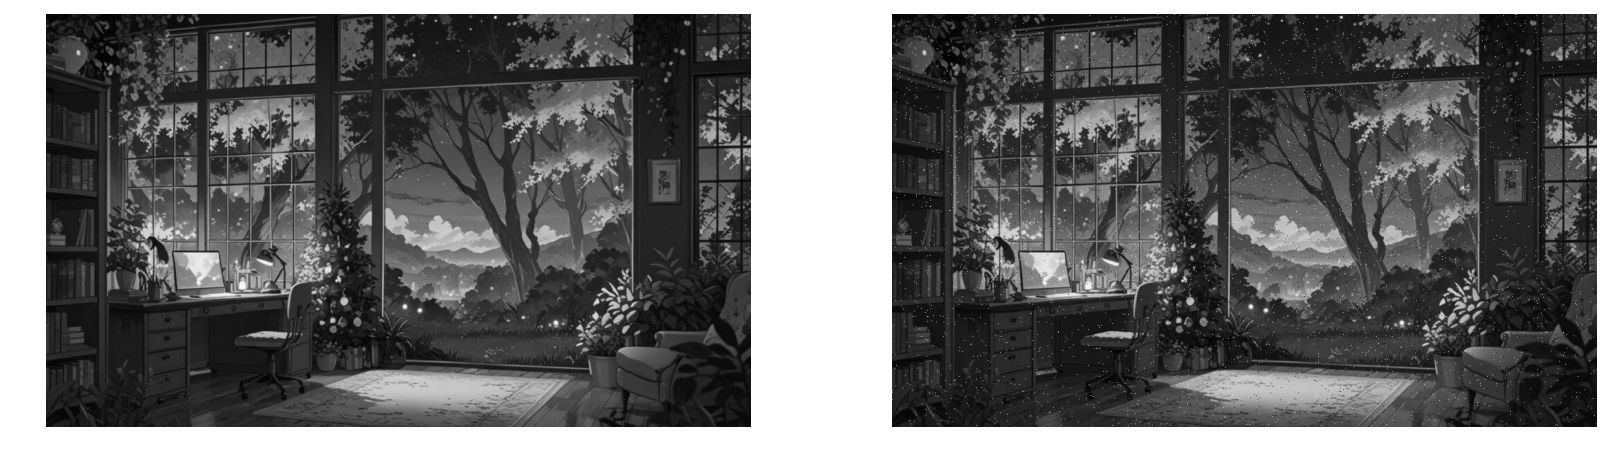

In [6]:
image = cv2.imread("images/input.jpg")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) / 255.0
image_gray = image_gray.astype(np.float32)

image_with_noise = add_snp_noise(image_gray, amount=0.01)
plt.subplot(121)
plt.imshow(image_gray, cmap="gray")
plt.subplot(122)
plt.imshow(image_with_noise, cmap="gray")
plt.show()

## Sección 1.2
Utilizar el siguiente código para generar un filtro del tipo box luego utilizar la función [filter2D](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04) para aplicar el filtro gernerado.

In [7]:
box_filter = 1 / 9 * np.ones([3, 3])

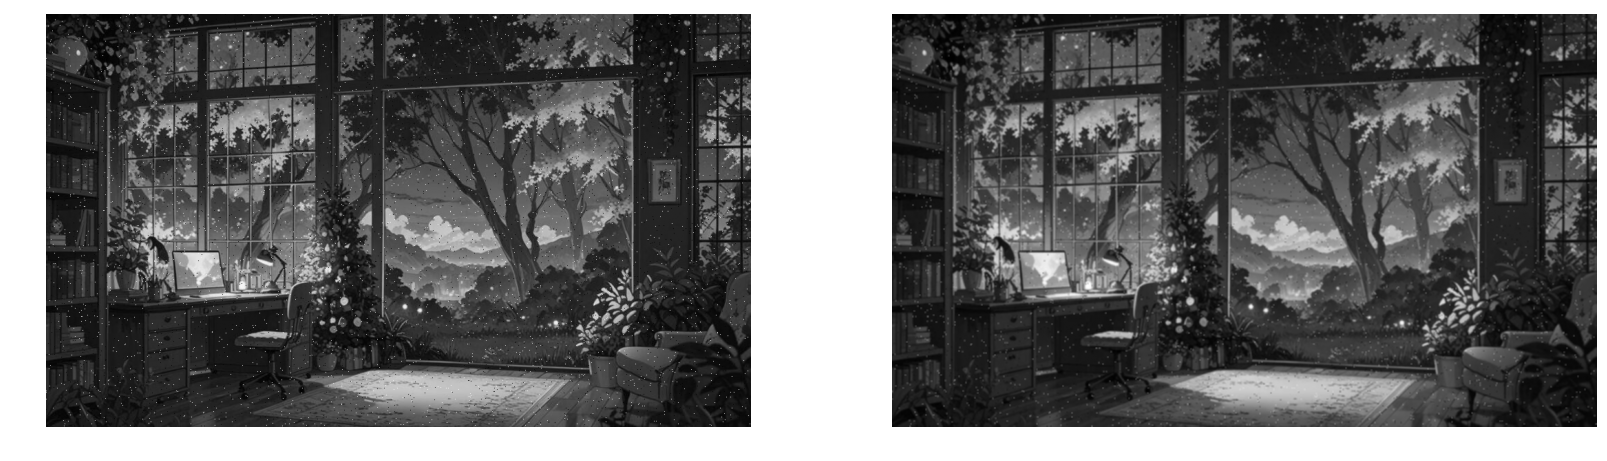

In [8]:
image_filtered = cv2.filter2D(image_with_noise, -1, box_filter)
plt.subplot(121)
plt.imshow(image_with_noise, cmap="gray")
plt.subplot(122)
plt.imshow(image_filtered, cmap="gray")
plt.show()

## Sección 1.3
Una vez hecho esto explorar con filtros de tamaño 5×5, 7×7 y observar el tradeoff entre eliminación de ruido y difuminado de la imagen. Intentar identificar si estos filtros agregan artifacts a la imagen. 

\**Recordar que los filtros deben estar normalizados* 

In [ ]:
### YOUR CODE ####

## Sección 1.4
En esta sección vamos a comprobar si da el mismo resultado aplicar un filtro por correlación y por convolución respectivamente. En particular la función  [filter2D](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04) aplica un filtro utilizando la operación de correlación. Vamos a utilizar [scipy](https://www.scipy.org/) para aplicar una convolución con la función [convolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html).


Verificar que en este caso es el mismo resultado. Se puede utilizar la siguiente función para comparar imágenes.


```
# np.linalg.norm(image_correlation - image_convolution)
```

\**Recomendación en ambos casos utilizar borde constante con valor 0 a la hora de definir como completar los valores que no están definidos en la convolución*

In [ ]:
from scipy import ndimage

In [ ]:
### YOUR CODE ###
box_filter = 1 / 9 * np.ones([3, 3])

In [ ]:
np.linalg.norm(image_correlation - image_convolution)

## Sección 1.5
Comparar la salida de un filtro box con la salida de un filtro gaussiano. Para hacer el filtrado con un filtro gausiano se puede utilizar la función [GaussianBlur](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1) de OpenCV.

En esta sección se pide visualizar ambas salidas y compararlas

\**Es posible que tengan que guardar las imágenes y descargarlas para visualizar la difrencia enter ellas. Las diferencias se visualizan mejor con un kernel de mayor tamaño*

In [ ]:
#### Your Code ####

## Sección 1.6

Utilizar la función [medianBlur](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9) que aplica un filtro de mediana para verificar como elimina el ruido ’*Salt Pepper*’ de la imagen en comparación con el filtrado lineal.

Se sugiere aplicar el filtro de mediana con ventanas de distinto tamaño.

In [ ]:
### YOUR CODE
## Use Integer version of noisy image in this section, medianBlur function only works for kernel size 3,5 for float images.
image_with_noise_int = (image_with_noise * 255).astype(np.uint8)

# Parte 2 Avanzado Filtros **[Opcional]**

Esta parte es similar a la anterior pero es necesario implementar desde cero las funciones de convolución y de correlación en Python. También es necesario implementar diferentes un filtro gaussiano para procesamiento de imágenes.

In [ ]:
## Cargar la siguiente imagen ##
image = cv2.imread("./images/owl.png")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap="gray")

#### Parte 2.1
Comencemos por generar un filtro Gaussiano para hacer blur en una imagen. Para ello vamos a generar tres kernels Gaussianos con σ = {3, 5, 7}. 

Utilizando la siguiente formula:

$$
 \begin{equation}
    h(x,y)=\frac{1}{\sqrt{2\pi\sigma^2}}
    \exp\left(-\frac{1}{2\sigma^2}(x^2 + y^2 )
    \right)
   \end{equation}
$$

In [ ]:
# Hacer blur de una image utilizando filtros de diferentes tamaño y simga.
def gaussian_kernel(sigma: int) -> np.ndarray:
    """Generates gaussian kernel given a sigma value.

    Args:
        sigma: std of the gaussian distribution that generates the kernel.

    Returns:
        the generated gaussian kernel.

    """
    assert sigma % 2 == 1, "sigma must be an odd number"
    radius = int(np.ceil(3 * sigma))
    # print(r)
    # Generar los filtros 2D gaussianos para sigma = s
    gaussian_kernel = np.zeros([2 * radius + 1, 2 * radius + 1])

    for y in range(-radius, radius + 1):
        for x in range(-radius, radius + 1):
            # Aqui va la formula del filtro GAUSSIANO
            gaussian_kernel[y, x] = 0  # (Los arrays en Python comienzan en el índice 0)

    return gaussian_kernel

In [ ]:
g_3 = gaussian_kernel(3)
g_5 = gaussian_kernel(5)
g_7 = gaussian_kernel(7)

In [ ]:
plt.subplot(131)
plt.imshow(g_3)
plt.subplot(132)
plt.imshow(g_5)
plt.subplot(133)
plt.imshow(g_7)

### Parte 2.2

Una vez hecho esto vamos a difuminar la imagen de cargada que contiene un buho y visualizar el resultado para cada σ. Para ello va a ser necesario implementar las funciones *correlation_2d* y *convolution_2d*. 

Recordemos que la correlación tiene la siguiente formula:
$$
\begin{equation}
    G(x,y) = \sum_{u=-N}^N\sum_{v=-M}^M I(x+u,y+v)h(u,v)
    \end{equation}
$$

Y la convolución tiene la siguiente formula:

$$
\begin{equation}
H(x,y) = \sum_{u=-N}^N\sum_{v=-M}^M I(x-u,y-v)h(u,v)
\end{equation}
$$


In [ ]:
def correlation_2d(image: np.ndarray, template: np.ndarray ) -> np.ndarray:
    """ Two-dimensional cross-correlation between the input image and the desired kernel.

    Args:
        image: 2D Grayscale input image to be filtered.
        template: 2D filter that will be applied to input image.

    Returns:
        The image resulting of the cross-correlation between input image and kernel.

    """
    image_height, image_width = image.shape
    template_height, template_width = template.shape

    if image.dtype == np.uint8:
        image = image / 255.
    ### Your code goes here
    new_height = 0 # You need to add the correct values for new height and new width
    new_width = 0 #
    filtered_image = np.zeros([new_height,new_width])
    for y=1 :
        for x=1 :
            for v=1 :
                for u=1 :
                    filtered_image [y,x] = 0
    
    return filtered_image


In [ ]:
def convolution_2d(image: np.ndarray, kernel: np.ndarray ) -> np.ndarray:
    """ Two-dimensional convolution between the input image and the desired kernel.

    Args:
        image: 2D Grayscale input image to be filtered.
        kernel: 2D filter that will be applied to input image.

    Returns:
        The grayscale image resulting of the convolution between input image and kernel.

    """

    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    if image.dtype == np.uint8:
        image = image / 255. 
    ### Your code goes here
    new_height = 0 # You need to add the correct values for new height and new width
    new_width = 0 #
    filtered_image = np.zeros([new_height,new_width])
    for y=1 :
        for x=1 :
            for v=1 :
                for u=1 :
                    filtered_image[y,x] = 0
    return filtered_image

In [ ]:
# Filtrar las imagenes y visualizarlas
# Por la forma en que implementamos la correlación (4 for loops anidados) este código demora unos minutos
figure, axes = plt.subplots(1, 4, figsize=(24, 6))
# print(axs.shape)
axes[0].imshow(image_gray, cmap="gray")
axes[0].set_title("Imagen Original")
for idx, sigma in enumerate([3, 5, 9]):
    gausian_filter = gaussian_kernel(sigma)
    image_smoothed = correlation_2d(image_gray, gausian_filter)
    # print(f'Correlación de la imagen con un filtro con sigma={sigma}')
    axes[idx + 1].imshow(image_smoothed, cmap="gray")
    axes[idx + 1].set_title(f"Correlación de la imagen con un filtro con sigma={sigma}")

#### Parte 2.2 Donde está Wally

Buscando a Wally. La función de correlación se puede utilizar para comparar dos parches de imágenes distintas y ver si coinciden. Si utilizamos la función de correlación es posible encontrar a Wally (`puzzle5_waldo.jpg`) en la imagen del puzle (`puzzle5.jpg`).

Debemos aplicar la función de correlación y buscar el máximo en la activación entre el parche y la imagen.

In [ ]:
# Usemos la función de correlación para encontrar a Wally.

template = imread_rgb("images/puzzle5_waldo.jpg")
image_puzzle = imread_rgb("images/puzzle5.jpg")

plt.imshow(image_puzzle)
plt.title("Image")
plt.show()

plt.figure(figsize=(1, 1))
plt.imshow(template)
plt.title("Template")

plt.show()

In [ ]:
image_puzzle_gray = cv2.cvtColor(image_puzzle, cv2.COLOR_RGB2GRAY)
template_gray = cv2.cvtColor(template, cv2.COLOR_RGB2GRAY)
image_puzzle_gray = image_puzzle_gray / 255.0
template_gray = template_gray / 255.0
# Vamos a utilizar la función filter2D de opencv que está implementada de manera más eficiente.
# result = correlationdot_2D(img_puzzle_gray,template_gray)
result = cv2.filter2D(image_puzzle_gray, -1, template_gray)

plt.imshow(result)
plt.title("Cross Correlation Result")

In [ ]:
y_peak, x_peak = np.unravel_index(result.argmax(), result.shape)

y_offSet = y_peak
x_offSet = x_peak


mask = np.zeros(image_puzzle.shape[0:2])
template_height = template.shape[0]
template_width = template.shape[1]

mask[y_offSet : y_offSet + template_height, x_offSet : x_offSet + template_width] = 1

plt.figure(figsize=(20, 20))
plt.imshow(cv2.bitwise_and(image_puzzle, image_puzzle, mask=mask.astype(np.uint8)))
plt.title("Encontramos a Wally?")
plt.show()

#### Parte 2.4

Algo no funcionó, no fue posible encontrar a wally? Si el método anterior no funcionó es posible usar la función de correlación cruzada normalizada.

$$
 \begin{equation}
    G(x,y) =\frac{I_{sub}(x,y)-I^{sub}_{mean}}{\left\|I_{sub}(x,y) - I^{sub}_{mean}\right\|} * \frac{h-h_{mean}}{\left\|h-h_{mean}\right\|}
\end{equation}
$$

Donde:

$$\left\|f\right\| = \sqrt{\sum_{u=1}^n\sum_{v=1}^m f(u,v)^2}$$ 
Es la norma L2 de un parche de la imagen y :
    
$$f_{mean} = \frac{1}{H\times W} \sum_{x=1}^H\sum_{y=1}^W f(x,y)$$ Es el promedio de dicho parche.

Para esto va a ser necesario implementar la función de correlación cruzada normalizada.

In [ ]:
def normalized_correlation_2d(image:np.ndarray, kernel:np.ndarray) -> np.ndarray:
    """ Two-dimensional normalized croos-correlation between the input image and the desired kernel.

    Args:
        image: 2D Grayscale input image to be filtered.
        kernel: 2D filter that will be correlated with input image.

    Returns:
        The grayscale image resulting of the normalized cross-correlation between input image and kernel.

    """
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    kernel_mean = np.mean(kernel)
    centered_kernel = kernel - kernel_mean
    normalized_template = centered_kernel / (np.sqrt(np.sum(np.power(centered_kernel,2)))+1e-8)

    if image.dtype == np.uint8:
        image = image / 255. 
    ### Your code goes here
    result_height = 
    result_width = 
    result = np.zeros([result_height,result_width])
    for y=1 :
        for x=1 :
            result[y,x] = 
    return result

In [ ]:
# Vamos a utilizar la función correlationdot_2D que usa producto de matrices y es mas eficiente que la version
# implementada anteriormente
result = normalizedcorrelation_2d(image_puzzle_gray, template_gray)

plt.imshow(result)
plt.title("Cross Correlation Result")

In [ ]:
y_peak, x_peak = np.unravel_index(result.argmax(), result.shape)

y_offSet = y_peak
x_offSet = x_peak


mask = np.zeros(img_puzzle.shape[0:2])

mask[y_offSet : y_offSet + template_height, x_offSet : x_offSet + template_width] = 1

plt.figure(figsize=(20, 20))
plt.imshow(cv2.bitwise_and(image_puzzle, image_puzzle, mask=mask.astype(np.uint8)))

plt.title("Encontramos a Wally?")
plt.show()

# Parte 3 Detección de Bordes

Esta seccion es vamos a trabajar haciendo detección de bordes con distintos algoritmos.

## Sección 3.1 
Ahora hagamos detección de bordes. Se puede comenzar con el siguiente código:

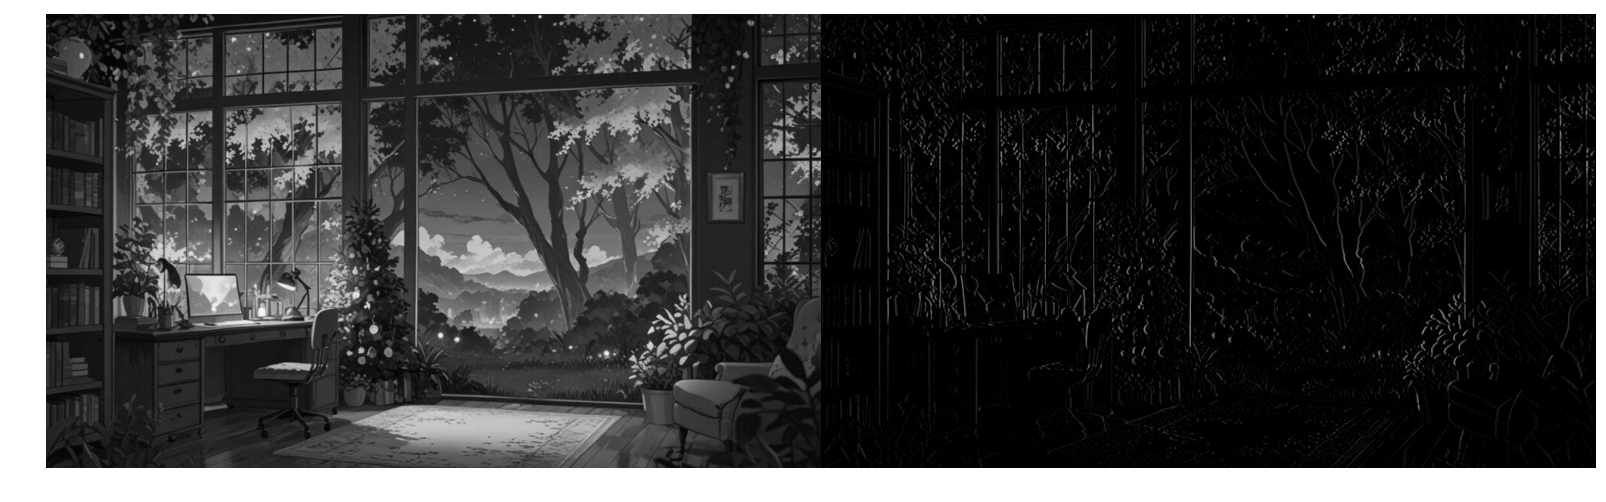

In [9]:
image = imread_rgb("images/input.jpg")
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) / 255.0

edge_filter = np.array([-1, 0, 1])
edge_filter = edge_filter.reshape(1, 3)
# convertir el filtro a 2D
edge_image_vertical = cv2.filter2D(image_gray, -1, edge_filter)

plt.imshow(np.concatenate([image_gray, edge_image_vertical], axis=1), cmap="gray", vmin=0, vmax=1)

## Sección 3.2 
Modificar el filtro anterior para detectar bordes horizontales.


In [ ]:
#### YOUR CODE ####

## Sección 3.3
Utilizar las funciones de convolución y correlación para aplicar el filtro. Verificar que los resultados sean distintos

In [ ]:
#### YOUR CODE ####
#edge_image_by_convolution = 
#edge_image_by_correlation = 

In [ ]:
np.linalg.norm(edge_image_by_convolution - edge_image_by_correlation)

## Sección 3.4
Calcular la magnitud de los bordes incluyendo ambas direcciones x e y.
Recordar la formula $$\left\|\nabla f\right\|= \sqrt{\frac{\partial f}{\partial x}^2 + \frac{\partial f}{\partial y}^2}$$

La salida debería ser la siguiente:

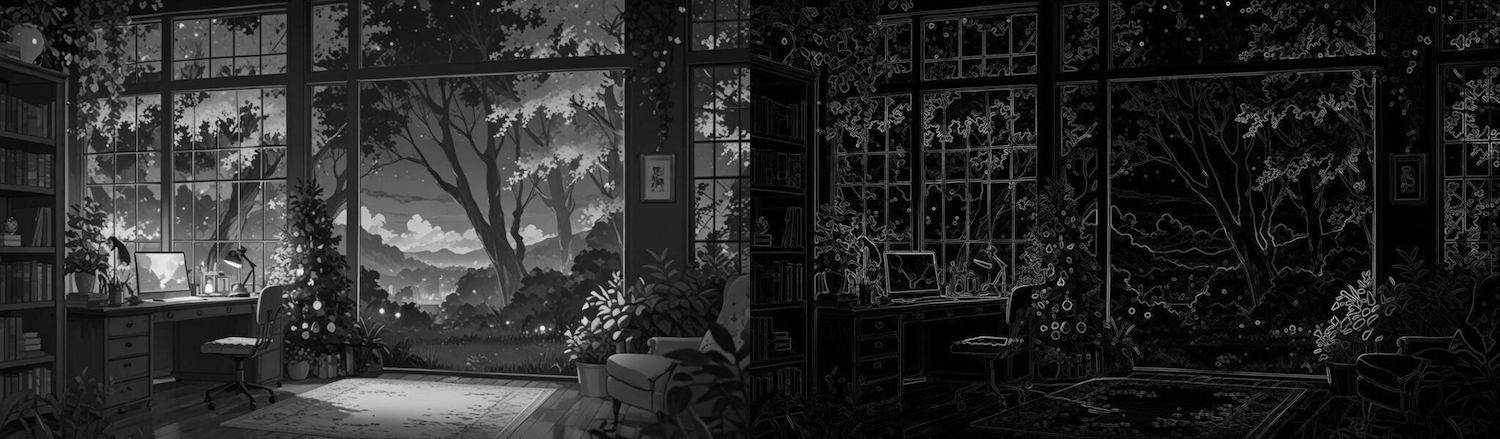


## Sección 3.5

Estudiar el comportamiento de hacer la detección ed bordes filtrando la imagen con un filtro de difuminado (Box o Gaussiano) previamente. Verificar que es posible eliminar bordes que son ruido o detectar bordes más gruesos si se cambia el tamaño del filtro.

In [ ]:
# YOUR CODE ###

# Parte 4 Detección de Rectas

En esta parte exploraremos como es posible detectar los límites de la calle en la imagen de una carretera. Esto podría ser potencialmente usado en auto autónomo. En la siguiente sección vamos a hacer detección de bordes y extraer las coordenadas de los bordes a izquierda y derecha de la carretera.

## Sección 4.1
Implementar código para estimar las rectas de la calle utilizando mínimos cuadrados y dibujar el resultado sobre la imagen original. El resultado debería verse de la siguiente manera:

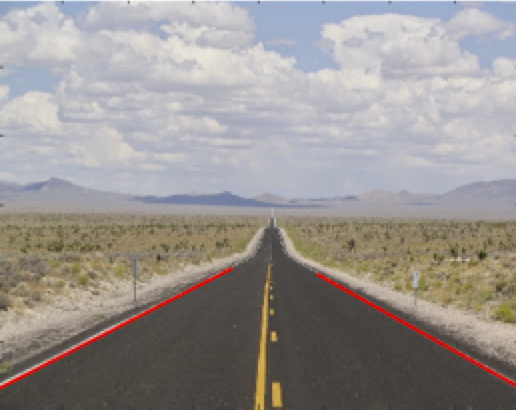


Completar el siguiente código para estimar las rectas de la imagen.

Para hacer el calculo de mínimos cuadrados se puede usar la función [lstsq](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html) de numpy

In [ ]:
# Load Image
highway_image = imread_rgb("images/highway.jpg")
# Convert image to Grayscale
highway_image_gray = cv2.cvtColor(highway_image, cv2.COLOR_RGB2GRAY)

height, width = highway_image.shape

# Apply gaussian filter to blur image
highway_image_blurred = cv2.GaussianBlur(highway_image_gray, (7, 7), 2)

# Detect edges with canny edge detector
highway_edges_image = cv2.Canny(highway_image_blurred, 150, 250).astype(np.uint16)

# Apply filter for edges in a particular direction edge1=left_edge edge2 =
# right_edge

diagonal_filter_left = np.array([[0, 1], [1, 0]])
diagonal_filter_right = np.array([[1, 0], [0, 1]])

left_edges = cv2.filter2D(highway_edges_image, -1, diagonal_filter_left)
right_edges = cv2.filter2D(highway_edges_image, -1, diagonal_filter_right)

# Threshold the edge image.
left_edges[left_edges < 510] = 0
right_edges[right_edges < 510] = 0

plt.imshow(np.concatenate([highway_edges_image, left_edges, right_edges], axis=1), cmap="gray")
plt.show()

# Find all the detected edge coordinates.

y_1, x_1 = np.nonzero(left_edges)
y_2, x_2 = np.nonzero(right_edges)

# data normaliaztion x/width y/height convert matrix coordinates to image coordinates for drawing.


x_1 = (x_1) / width
y_1 = (height - y_1) / width
x_2 = x_2 / width
y_2 = (height - y_2) / width

# Your code #
# Estimate the lines for each edge #

# For solving the system we need 2D arrays and stack ones to solve the system a.x + b = y
#     [m]
#     [b]
# [x 1][y]
#
# p_1 = your answer.
# p_2 = your answer


plt.imshow(highway_image)
id_x1 = np.linspace(x_1.min(), x_1.max(), 15)
# Matplotlib uses image coordinates when unsing imshow
plt.plot(id_x1 * width, height - np.squeeze(p_1[1] + p_1[0] * id_x1) * width, "r-", "linewidth", 18.0)

id_x2 = np.linspace(x_2.min(), x_2.max(), 15)
plt.plot(id_x2 * width, height - np.squeeze(p_2[1] + p_2[0] * id_x2) * width, "r-", "linewidth", 18.0)